<a href="https://colab.research.google.com/github/debashisrana/ML---Master-Folder/blob/master/First_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.2.0-rc2


In [0]:
a_string = tf.Variable('This is a string',tf.string)
a_number = tf.Variable(10,tf.int16)
a_float= tf.Variable(4.5,tf.float32)

In [0]:
print(a_number + a_number)

tf.Tensor(20, shape=(), dtype=int32)


In [0]:
tensor1 = tf.Variable([[1,3],[2,4]])

In [0]:
tf.rank(tensor1)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [0]:
tf.shape(tensor1)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2], dtype=int32)>

In [0]:
tensor2 = tf.ones((9))
print(tensor2)

tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(9,), dtype=float32)


In [0]:
tf.reshape(tensor2,(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X_trn = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
X_tst = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [6]:
X_trn.head(20)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


In [7]:
X_trn.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

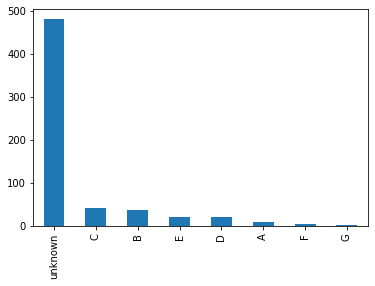

In [8]:
X_trn.deck.value_counts().plot(kind='bar')

In [9]:
X_trn.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [10]:
X_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [11]:
X_trn.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [12]:
X_trn['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [0]:
# Catagorical_columns = ['sex','class', 'deck', 'embark_town', 'alone']
# numerical_columns = ['n_siblings_spouses','parch','fare','age']
# feature_column=[]

# for column in Catagorical_columns:
#   vocabulary = X_trn[column].unique()
#   feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(column,vocabulary))

# for column in numerical_columns:
#  feature_column.append(tf.feature_column.numeric_column(column,dtype=tf.float32))

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label = LabelEncoder()
X_trn['sex'] = label.fit_transform(X_trn['sex'])

# Catagorical_columns = ['sex','class', 'deck', 'embark_town', 'alone']

In [0]:
train_class = pd.get_dummies(X_trn['class'],drop_first=True)

In [0]:
X_trn = pd.get_dummies(X_trn,drop_first=True,columns=['class','embark_town', 'alone'])

In [20]:
X_trn.head()

,survived,sex,age,n_siblings_spouses,parch,fare,deck,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,embark_town_unknown,alone_y
0,0,1,22.0,1,0,7.2500,unknown,0,1,0,1,0,0
1,1,0,38.0,1,0,71.2833,C,0,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,unknown,0,1,0,1,0,1
3,1,0,35.0,1,0,53.1000,C,0,0,0,1,0,0
4,0,1,28.0,0,0,8.4583,unknown,0,1,1,0,0,1


In [0]:
X = X_trn.drop(['deck','survived'],axis=1)

In [0]:
y = X_trn['survived']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten,Dense

In [0]:
model = Sequential()
model.add(Dense(X_train.shape[1],activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(X_train,y_train.to_numpy(),batch_size=100,epochs=10,verbose=1)

Epoch 1/10
501/501 [==============================] - 0s 186us/step - loss: 0.6907 - accuracy: 0.5569
Epoch 2/10
501/501 [==============================] - 0s 21us/step - loss: 0.6583 - accuracy: 0.6946
Epoch 3/10
501/501 [==============================] - 0s 20us/step - loss: 0.6418 - accuracy: 0.7325
Epoch 4/10
501/501 [==============================] - 0s 19us/step - loss: 0.6272 - accuracy: 0.7345
Epoch 5/10
501/501 [==============================] - 0s 21us/step - loss: 0.6120 - accuracy: 0.7425
Epoch 6/10
501/501 [==============================] - 0s 21us/step - loss: 0.5996 - accuracy: 0.7505
Epoch 7/10
501/501 [==============================] - 0s 21us/step - loss: 0.5867 - accuracy: 0.7545
Epoch 8/10
501/501 [==============================] - 0s 21us/step - loss: 0.5767 - accuracy: 0.7465
Epoch 9/10
501/501 [==============================] - 0s 20us/step - loss: 0.5660 - accuracy: 0.7445
Epoch 10/10
501/501 [==============================] - 0s 18us/step - loss: 0.5569 - accur

In [0]:
y_pred = model.predict_classes(X_test)

In [69]:
model.evaluate(X_test,y_test)

126/126 [==============================] - 0s 153us/step


[0.5520186301261659, 0.761904776096344]

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
confusion_matrix(y_test,y_pred)

array([[69, 10],
       [17, 30]])

In [62]:
accuracy_score(y_test,y_pred)

0.7857142857142857